In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# About the Dataset and Why I Chose It
I found an interesting dataset on survey results regarding mental health in the workplace, focusing on tech. This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. From what I observed while getting my computer science degree, talking with students and friends working in the industry, and reading comments online, I'm curious to how tech companies view mental illness and health. I'm also specifically interested in seeing if employees will seek treatment.

In [2]:
df = pd.read_csv('/Users/zacharyheick/Downloads/survey.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

**Timestamp**  
**Age**  
**Gender**  
**Country**  
**state**: If you live in the United States, which state or territory do you live in?  
**self_employed**: Are you self-employed?  
**family_history**: Do you have a family history of mental illness?  
**treatment**: Have you sought treatment for a mental health condition?  
**work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?  
**no_employees**: How many employees does your company or organization have?  
**remote_work**: Do you work remotely (outside of an office) at least 50% of the time?  
**tech_company**: Is your employer primarily a tech company/organization?  
**benefits**: Does your employer provide mental health benefits?  
**care_options**: Do you know the options for mental health care your employer provides?  
**wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?  
**seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?  
**anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?  
**leave**: How easy is it for you to take medical leave for a mental health condition?  
**mental_health_consequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?  
**phys_health_consequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?  
**coworkers**: Would you be willing to discuss a mental health issue with your coworkers?  
**supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?  
**mental_health_interview**: Would you bring up a mental health issue with a potential employer in an interview?  
**phys_health_interview**: Would you bring up a physical health issue with a potential employer in an interview?  
**mental_vs_physical**: Do you feel that your employer takes mental health as seriously as physical health?  
**obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  
**comments**: Any additional notes or comments  

# Cleaning the Data

### Dropping Columns

In [4]:
df.drop(['Timestamp', 'comments', 'state'], axis=1, inplace=True)

In [5]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### Age

In [6]:
df[(df['Age'] < 18) | (df['Age'] > 100)]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
143,-29,Male,United States,No,No,No,NaN,More than 1000,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
364,329,Male,United States,No,No,Yes,Often,6-25,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No
390,99999999999,All,Zimbabwe,Yes,Yes,Yes,Often,1-5,No,Yes,...,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes
715,-1726,male,United Kingdom,No,No,Yes,Sometimes,26-100,No,No,...,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No
734,5,Male,United States,No,No,No,NaN,100-500,No,Yes,...,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No
989,8,A little about you,"Bahamas, The",Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1090,11,male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No
1127,-1,p,United States,Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


There are a few rows with non-realistic ages, so I'll replace any age values less than 18 or greater than 100 with the median age.

In [7]:
df['Age'].median()

31.0

In [8]:
df['Age'].replace([5, -1726, -29, 11, -1, 8, 329, 99999999999], 31, inplace=True)

### Gender

Based on this survey, there are many categories regarding gender. I'll split this column into three categories: `Male`, `Female`, and `Trans / Other`.

In [9]:
male = ['Male', 'male', 'M', 'm', 'Male ', 'make', 'Make', 'Man', 'Cis Male', 'cis male', 'male leaning androgynous', 'msle', 'Malr',
        'Mal', 'something kinda male?', 'Male (CIS)',  'Cis Man', 'Mail', 'Guy (-ish) ^_^', 'Male-ish', 'maile',
        'ostensibly male, unsure what that really means']

female = ['Female', 'female', 'F', 'f', 'Woman', 'Female ', 'Femake', 'woman', 'femail', 'Female (cis)', 'Cis Female',
          'cis-female/femme']

trans_other = ['Female (trans)', 'fluid', 'Agender', 'All', 'Trans woman', 'Neuter', 'Androgyne', 'Enby', 'Trans-female',
               'queer', 'queer/she/they', 'non-binary', 'Genderqueer']

In [10]:
df['Gender'].replace(male, 'Male', inplace=True)
df['Gender'].replace(female, 'Female', inplace=True)
df['Gender'].replace(trans_other, 'Trans / Other', inplace=True)

In [11]:
df.drop(df[df['Gender'] == 'A little about you'].index, inplace=True)
df.drop(df[df['Gender'] == 'p'].index, inplace=True)
df.drop(df[df['Gender'] == 'Nah'].index, inplace=True)

### Self Employed

There were a few self-employed values listed as `NaN`, so I assumed that these people were self-employed.

In [12]:
df['self_employed'].fillna('Yes', inplace=True)

### Work Interference

The survey question asked, "If you have a mental condition, do you feel that it interferes with your work?". Those who did not have a mental condition did not answer the question. To make this more clear, I replaced `NaN` with `No Mental Condition`.

In [13]:
df['work_interfere'].fillna('No Mental Condition', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256 entries, 0 to 1258
Data columns (total 24 columns):
Age                          1256 non-null int64
Gender                       1256 non-null object
Country                      1256 non-null object
self_employed                1256 non-null object
family_history               1256 non-null object
treatment                    1256 non-null object
work_interfere               1256 non-null object
no_employees                 1256 non-null object
remote_work                  1256 non-null object
tech_company                 1256 non-null object
benefits                     1256 non-null object
care_options                 1256 non-null object
wellness_program             1256 non-null object
seek_help                    1256 non-null object
anonymity                    1256 non-null object
leave                        1256 non-null object
mental_health_consequence    1256 non-null object
phys_health_consequence      1256 non-null o

# Analysis

### Survey Demographics

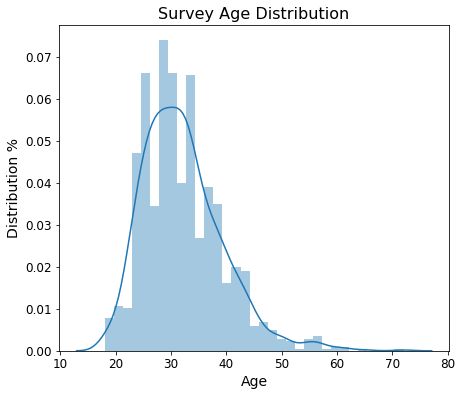

In [15]:
plt.figure(figsize=(7,6))
plt.ylabel('Distribution %', size=14)
plt.yticks(size=12)
plt.xlabel('Age', size=14)
plt.xticks(size=12)
plt.title('Survey Age Distribution', size=16)
sns.distplot(df['Age']);

In [16]:
df['Gender'].value_counts()

Male             995
Female           247
Trans / Other     14
Name: Gender, dtype: int64

In [17]:
df['tech_company'].value_counts()

Yes    1028
No      228
Name: tech_company, dtype: int64

In [18]:
df['no_employees'].value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               159
500-1000           60
Name: no_employees, dtype: int64

In [19]:
df['family_history'].value_counts()

No     767
Yes    489
Name: family_history, dtype: int64

In [20]:
df['treatment'].value_counts()

Yes    634
No     622
Name: treatment, dtype: int64

In total, there were 1256 people surveyed. Out of this population, the dominant age group was late twenties to early thirties, with the majority being male. About half of those surveyed sought treatment for mental health, while slightly more than half did not have a family history of mental health problems.

### Mental Health in the Work Environment
I was interested to see how mental and physical health problems were perceived in the workplace and while interviewing.

### Would you bring up a physical / mental health issue with a potential employer in an interview?

In [21]:
phys_health_interview = df.groupby('phys_health_interview').count()['Age']
mental_health_interview = df.groupby('mental_health_interview').count()['Age']

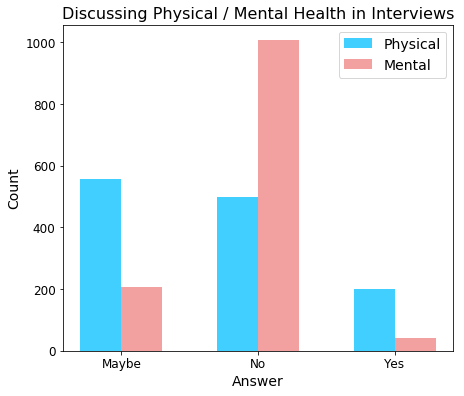

In [22]:
pos = [0,1,2]
width = 0.3

fig, ax = plt.subplots(figsize=(7,6))

plt.bar(pos, 
        phys_health_interview, 
        width, 
        alpha=0.75, 
        color='deepskyblue',
        label='Physical')

plt.bar([p + width for p in pos], 
        mental_health_interview,
        width, 
        alpha=0.75, 
        color='lightcoral',
        label='Mental')

ax.set_xticks([p + width/2 for p in pos])
ax.set_xticklabels(phys_health_interview.index, size=12)
plt.yticks(size=12)
ax.set_ylabel('Count', size=14)
ax.set_xlabel('Answer', size=14)
ax.set_title('Discussing Physical / Mental Health in Interviews', size=16)

plt.legend(['Physical', 'Mental'], loc='upper right', prop={'size':14})
plt.show();

### Do you think that discussing a physical / mental health issue with your employer would have negative consequences?

In [23]:
phys_health_consequences = df.groupby('phys_health_consequence').count()['Age']
mental_health_consequences = df.groupby('mental_health_consequence').count()['Age']

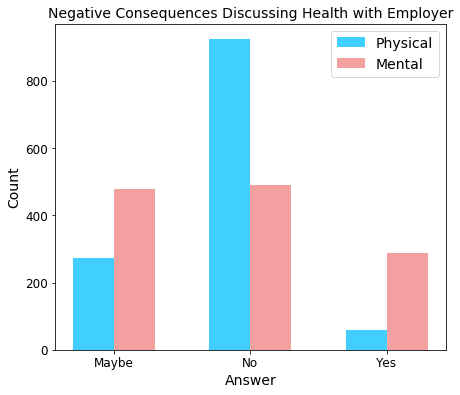

In [24]:
pos = [0,1,2]
width = 0.3

fig, ax = plt.subplots(figsize=(7,6))

plt.bar(pos, 
        phys_health_consequences, 
        width, 
        alpha=0.75, 
        color='deepskyblue',
        label='Physical')

plt.bar([p + width for p in pos], 
        mental_health_consequences,
        width, 
        alpha=0.75, 
        color='lightcoral',
        label='Mental')

ax.set_xticks([p + width/2 for p in pos])
ax.set_xticklabels(phys_health_consequences.index, size=12)
plt.yticks(size=12)
ax.set_ylabel('Count', size=14)
ax.set_xlabel('Answer', size=14)
ax.set_title('Negative Consequences Discussing Health with Employer', size=14)

plt.legend(['Physical', 'Mental'], loc='upper right', prop={'size':14})
plt.show();

### Would you be willing to discuss a mental health issue with your coworkers or direct supervisor(s)?

In [25]:
df['coworkers'].value_counts()

Some of them    773
No              260
Yes             223
Name: coworkers, dtype: int64

In [26]:
df['supervisor'].value_counts()

Yes             514
No              392
Some of them    350
Name: supervisor, dtype: int64

It was interesting to see the stigma of mental health in both the interview process and in the workplace. I also found it interesting that more people would say `yes` to discussing mental health with their supervisors compared to their coworkers.

# Modeling

A question I'm curious to answer is **can we predict if someone will seek mental health treatment based on the survey results?**

In [27]:
X = df.drop('treatment', axis=1)
y = df['treatment']

In [28]:
for col in df.columns:
    if col!= 'treatment' and col != 'Age':
        X[col] = X[col].astype('category')

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [29]:
def tune_hyperparameter(param_grid, algorithm, score, X, y):
    """
    Uses GridSearchCV to find the best hyperparameters for an
    algorithm. Prints the best score, parameter, and estimator.
    
    :param param_grid: list or dictionary of hyperparameters
    :param algorithm: classification algorithm to tune
    :param score: the metric type
    :param X: features set
    :param y: target set
    :returns: Grid object
    """
    grid = GridSearchCV(algorithm, param_grid, cv=10, scoring=score)
    grid.fit(X,y)
    print('Best Score: ' + str(grid.best_score_))
    print('Best Parameter: ' + str(grid.best_params_))
    print('Best Estimator: ' + str(grid.best_estimator_))
    return grid

In [30]:
def graph_learning_curve(algorithm, X, y):
    """
    Plots the learning curve of an algorithm.
    
    :param algorithm: the algorithm to plot
    :param X: features set
    :param y: target set
    """
    m,train_err,ts_err = learning_curve(algorithm,
                                    X,
                                    y, 
                                    train_sizes=np.linspace(0.1, 1.0, 20))

    train_cv_err = np.mean(train_err,axis=1)
    test_cv_err = np.mean(ts_err,axis=1)

    plt.figure(figsize=(10,7))
    plt.ylabel('Accuracy', size=16)
    plt.xlabel('Data Samples', size=16)
    plt.yticks(size=14)
    plt.xticks(size=14)
    tr, = plt.plot(m,train_cv_err, 'm')
    ts, = plt.plot(m,test_cv_err, '--r')
    plt.legend((tr,ts),('train','test'),loc='best', prop={'size':12});

### Decision Tree

In [31]:
depths = [i for i in range(1,21)]
dt_param_grid = dict(max_depth = depths, criterion = ['gini', 'entropy'])
dt_grid = tune_hyperparameter(dt_param_grid, DecisionTreeClassifier(), 'accuracy', X_train, y_train)

Best Score: 0.808873720137
Best Parameter: {'criterion': 'gini', 'max_depth': 6}
Best Estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [32]:
dt = DecisionTreeClassifier(max_depth=6, criterion='gini').fit(X_train, y_train)
dt_test_pred = dt.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, dt_test_pred))
print('Precision: ', precision_score(y_test, dt_test_pred, pos_label='Yes'))
print('Recall: ', recall_score(y_test, dt_test_pred, pos_label='Yes'))
print('F1: ', f1_score(y_test, dt_test_pred, pos_label='Yes'))

Accuracy:  0.766578249337
Precision:  0.765625
Recall:  0.773684210526
F1:  0.769633507853


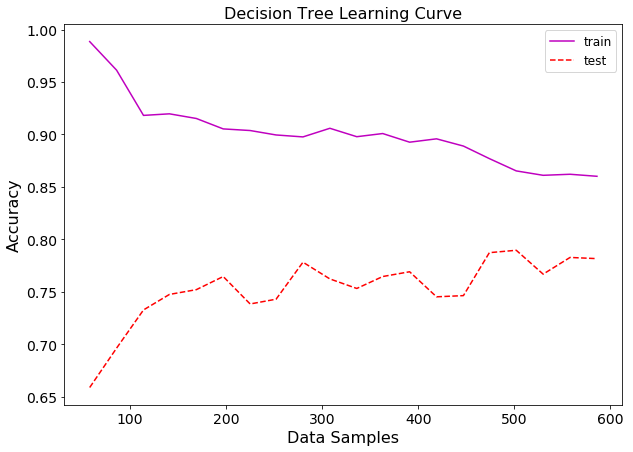

In [33]:
graph_learning_curve(dt, X_train, y_train)
plt.title('Decision Tree Learning Curve', size=16);

# Conclusion and Final Thoughts

I final accuracy score of 76.7% and recall score of 77.4% was pretty good to see. More time spent on feature selection could lead to increased scores.